### **EXERCISE 01**

In [1]:
import cv2 as cv
import numpy as np
import imutils

from google.colab.patches import cv2_imshow

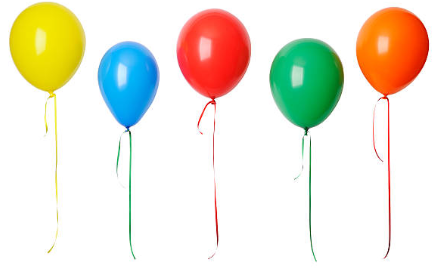

In [9]:
img = cv.imread('data/lab02.jpg')
cv2_imshow(img)





> **TASK 01**







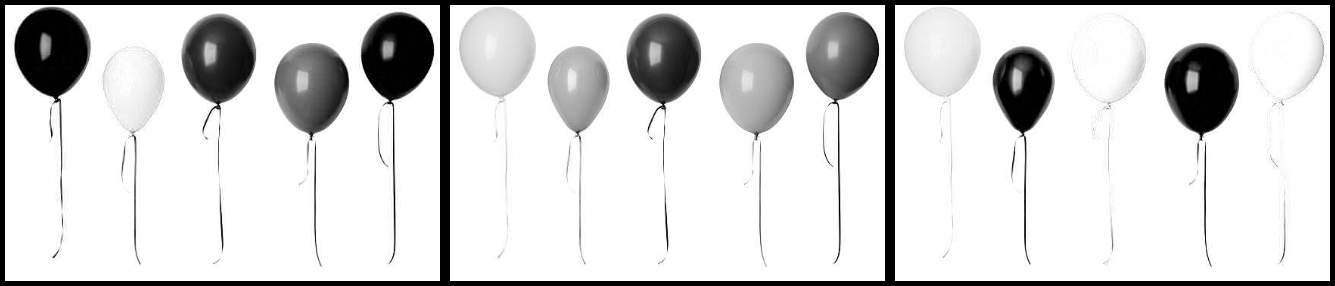

In [10]:
blue, green, red = cv.split(img)
channels = [blue, green, red]

for i in range(0, len(channels)):
  channels[i] = cv.copyMakeBorder(channels[i], 5, 5, 5, 5, cv.BORDER_CONSTANT, value=[0, 0, 0])

out = np.hstack((channels[0], channels[1], channels[2]))
cv2_imshow(out)



> **TASK 02 + 03**



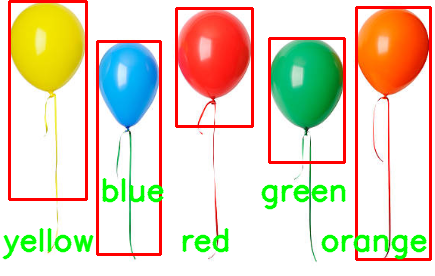

In [11]:
out = np.zeros((img.shape), dtype=np.uint8)
out[:] = img[:]

gray_img = cv.cvtColor(out, cv.COLOR_BGR2GRAY)

canny_img = cv.Canny(gray_img, 30, 200)

c_balloon, h = cv.findContours(canny_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

colors = ['yellow', 'blue', 'red', 'green', 'orange']
positions = [(3, 250), (100, 200), (180, 250), (260, 200), (320, 250)]
counts = 0

for i in c_balloon :
  (x, y, w, h) = cv.boundingRect(i)
  minArea = cv.minAreaRect(i)
  box = minArea[1][0] * minArea[1][1]
  if box > 1000 :
    cv.rectangle(out, (x,y), (x+w, y+h), (0,0,255), 2)
    cv.putText(out, colors[counts], positions[counts], cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)
    counts += 1
    
cv2_imshow(out)



> **TASK 04**



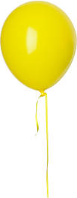

In [12]:
yellow_ball = img[y:y+h, x:x+w]
cv2_imshow(yellow_ball)



> **TASK 05**



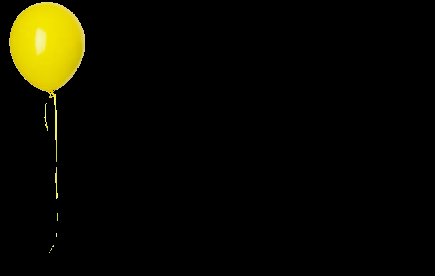

In [13]:
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#---yellow color
# low = np.array([22, 93, 0])
# high = np.array([45, 255, 255])

low = np.array([20, 80, 200])
high = np.array([50, 255, 250])

mask = cv.inRange(img_HSV, low, high)

out = cv.bitwise_and(img, img, mask=mask)

cv2_imshow(out)

HSV_yellow = out



> **TASK 06**



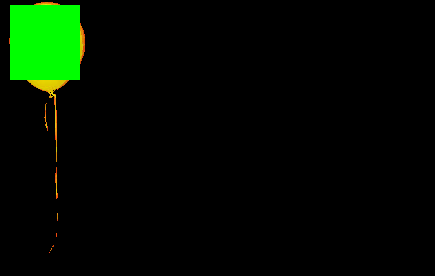

In [30]:
HSV_green = cv.cvtColor(HSV_yellow, cv.COLOR_BGR2HSV)
      
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])

mask = cv.inRange(HSV_green, low_green, high_green)
result = cv.bitwise_and(HSV_green, HSV_yellow, mask = mask)

result[5:80, 10:80] = (0,255,0)

cv2_imshow(result)



> **TASK 07**



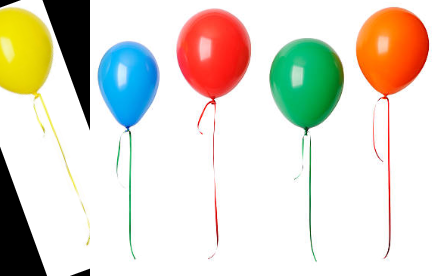

In [31]:
yellow_ball = img[:, :90]
rotated_yellow_ball = imutils.rotate(yellow_ball, angle=20)
img[:, :90] = rotated_yellow_ball

cv2_imshow(img)